In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | richards bay
Processing Record 2 of Set 1 | dien bien
City not found. Skipping...
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | acari
Processing Record 10 of Set 1 | isla mujeres
Processing Record 11 of Set 1 | prince rupert
Processing Record 12 of Set 1 | eminabad
Processing Record 13 of Set 1 | vallenar
Processing Record 14 of Set 1 | mazagao
Processing Record 15 of Set 1 | yulara
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | flinders
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | leningradskiy
Processing Record 21 of Set 1 | nikolskoye
Proces

Processing Record 39 of Set 4 | provideniya
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | hofn
Processing Record 42 of Set 4 | vanderhoof
Processing Record 43 of Set 4 | kyabram
Processing Record 44 of Set 4 | ruwi
Processing Record 45 of Set 4 | isoka
Processing Record 46 of Set 4 | alice springs
Processing Record 47 of Set 4 | alugan
Processing Record 48 of Set 4 | rundu
Processing Record 49 of Set 4 | kampong thum
Processing Record 50 of Set 4 | sayyan
Processing Record 1 of Set 5 | kenora
Processing Record 2 of Set 5 | trinidad
Processing Record 3 of Set 5 | najran
Processing Record 4 of Set 5 | kunming
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | klyuchi
Processing Record 7 of Set 5 | zatoka
Processing Record 8 of Set 5 | klaksvik
Processing Record 9 of Set 5 | iowa city
Processing Record 10 of Set 5 | kieta
Processing Record 11 of Set 5 | kavieng
Processing Record 12 of Set 5 | leh
Processing Record 13 of Set 5 | palaikastron
P

Processing Record 34 of Set 8 | hokitika
Processing Record 35 of Set 8 | havoysund
Processing Record 36 of Set 8 | kargil
Processing Record 37 of Set 8 | east london
Processing Record 38 of Set 8 | watsa
Processing Record 39 of Set 8 | acapetahua
Processing Record 40 of Set 8 | dunedin
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | pailon
Processing Record 43 of Set 8 | kutum
Processing Record 44 of Set 8 | kavaratti
Processing Record 45 of Set 8 | haines junction
Processing Record 46 of Set 8 | rancho palos verdes
Processing Record 47 of Set 8 | eucaliptus
Processing Record 48 of Set 8 | santa cruz
Processing Record 49 of Set 8 | port lincoln
Processing Record 50 of Set 8 | hovd
Processing Record 1 of Set 9 | kologriv
Processing Record 2 of Set 9 | kiunga
Processing Record 3 of Set 9 | maragogi
Processing Record 4 of Set 9 | daru
Processing Record 5 of Set 9 | nara
Processing Record 6 of Set 9 | cape coast
Processing Record 7 of Set 9 | fort saint john
City no

Processing Record 21 of Set 12 | ust-nera
Processing Record 22 of Set 12 | guilin
Processing Record 23 of Set 12 | cayeli
Processing Record 24 of Set 12 | sorong
Processing Record 25 of Set 12 | tarboro
Processing Record 26 of Set 12 | zemio
Processing Record 27 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 28 of Set 12 | dukat
Processing Record 29 of Set 12 | jacareacanga
Processing Record 30 of Set 12 | bozuyuk
Processing Record 31 of Set 12 | tarbagatay
Processing Record 32 of Set 12 | skjervoy
Processing Record 33 of Set 12 | kitami
Processing Record 34 of Set 12 | garowe
Processing Record 35 of Set 12 | kenai
Processing Record 36 of Set 12 | artyom
Processing Record 37 of Set 12 | shenkursk
Processing Record 38 of Set 12 | jinchang
Processing Record 39 of Set 12 | atambua
Processing Record 40 of Set 12 | sur
Processing Record 41 of Set 12 | zamora
Processing Record 42 of Set 12 | zinder
Processing Record 43 of Set 12 | chimbote
Processing Record 44 of Set 1

In [12]:
len(city_data)

587

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Richards Bay,-28.7830,32.0377,59.77,73,32,3.74,ZA,2021-10-19 18:15:17
1,Albany,42.6001,-73.9662,63.45,49,7,7.00,US,2021-10-19 18:13:10
2,Punta Arenas,-53.1500,-70.9167,62.71,51,75,35.68,CL,2021-10-19 18:11:09
3,Atuona,-9.8000,-139.0333,78.39,75,26,21.00,PF,2021-10-19 18:10:31
4,New Norfolk,-42.7826,147.0587,39.90,71,22,2.30,AU,2021-10-19 18:14:15
5,Jamestown,42.0970,-79.2353,65.52,51,1,8.99,US,2021-10-19 18:12:47
6,Puerto Ayora,-0.7393,-90.3518,80.56,80,63,9.98,EC,2021-10-19 18:10:57
7,Acari,-15.4311,-74.6158,79.39,45,97,10.96,PE,2021-10-19 18:10:50
8,Isla Mujeres,21.2311,-86.7310,87.85,69,98,11.70,MX,2021-10-19 18:15:19
9,Prince Rupert,54.3161,-130.3201,53.29,43,100,14.97,CA,2021-10-19 18:15:20


In [16]:
#reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Richards Bay,ZA,2021-10-19 18:15:17,-28.7830,32.0377,59.77,73,32,3.74
1,Albany,US,2021-10-19 18:13:10,42.6001,-73.9662,63.45,49,7,7.00
2,Punta Arenas,CL,2021-10-19 18:11:09,-53.1500,-70.9167,62.71,51,75,35.68
3,Atuona,PF,2021-10-19 18:10:31,-9.8000,-139.0333,78.39,75,26,21.00
4,New Norfolk,AU,2021-10-19 18:14:15,-42.7826,147.0587,39.90,71,22,2.30


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Visualizing the Weather data

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

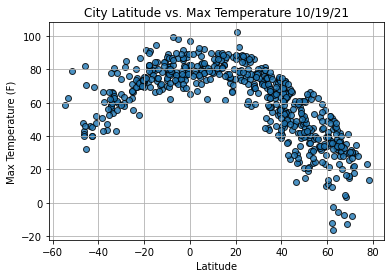

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


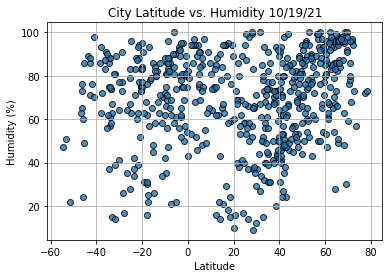

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

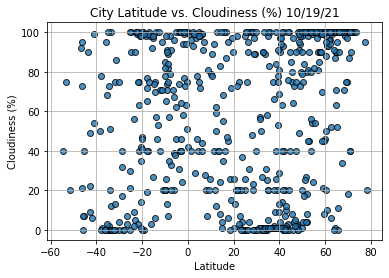

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

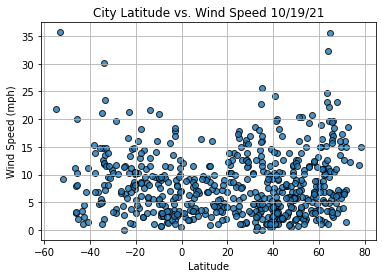

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Linear Regression

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

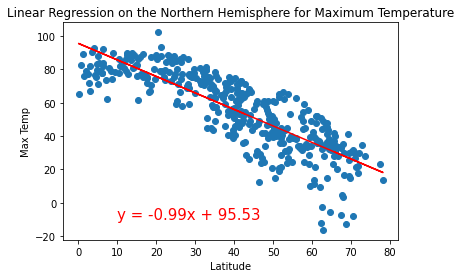

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-10))

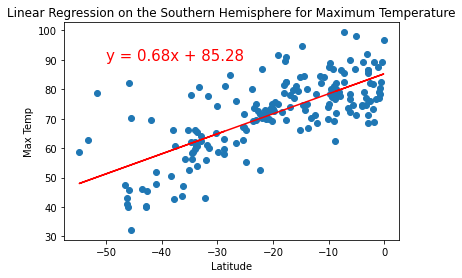

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

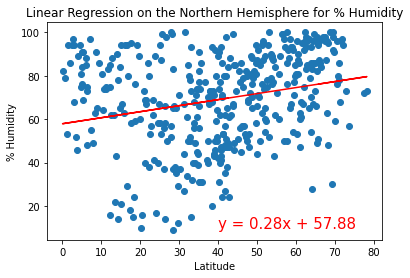

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))


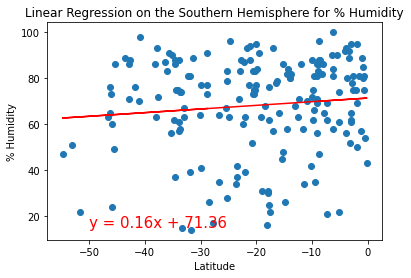

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

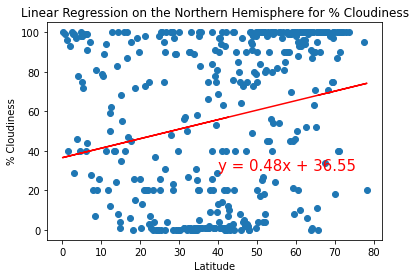

In [45]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,30))


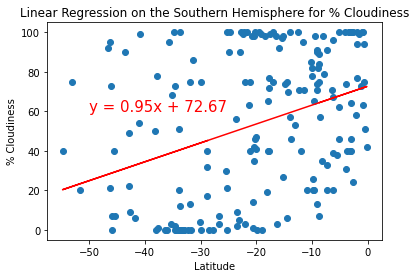

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))


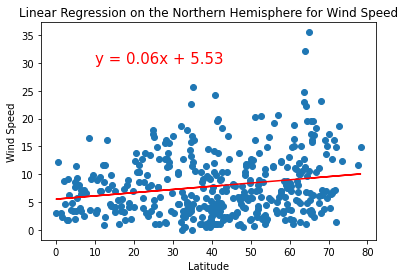

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,30))


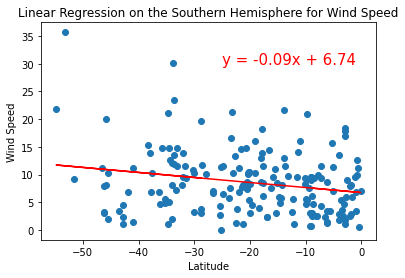

In [53]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-25,30))
